In [1]:
# Import statements
# I am importing several classifiers here to give you some ideas!

import glob
import re
import parselmouth
from parselmouth.praat import call
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [153]:
### GET NORTHEAST DATA

# Extracting the formant information takes quite a while!
# Don't proceed to the next step until the asterisk in brackets to the
# left has a number inside it, meaning execution is complete.
# [*] means "this code is still executing"
# [2] (or any number) means "this code has been executed"

# This variable here will keep track of how many files have
# been processed so far. It will print out for every 100 files.

# Store northeast data in this array:
sung = []
voice = []


# You will obviously need to change this path below to make it work.
duration_ct = 0
for wav_file in glob.glob("/Users/Jason/Desktop/NLP_FinalData/*.wav"):
    # Print out a status every time you've processed 100 files.
    counter += 1

    # This code should give you an idea of how to use parselmouth
    # to carry out most of Praat's functionality within python.
    # Basically, you can go run a command in Praat, paste the command
    # history into a Praat script, and then insert the command into
    # the parselmouth call() method, adjusting commas, quotes, etc.

    # Get duration, mean pitch, mean intensity
    sound = parselmouth.Sound(wav_file)
    pitch = call(sound, "To Pitch", 0, 75, 600) 
    meanpitch = call(pitch, "Get mean", 0, 0, "Hertz")
    intensity = call(sound, "To Intensity", 75, 0, "yes")
    meanintensity = call(intensity, "Get mean", 0, 0, "energy")
    duration = call(sound, "Get total duration")
    duration_ct+=duration
    # R feature
    temp_name = re.sub(".wav", "", wav_file)
    
    # get mean F1 (vowels only)
    formant = call(sound, "To Formant (burg)", 0, 5, 5500, 0.025, 50)
    tg_file = re.sub("wav", "TextGrid", wav_file)
    textgrid = call("Read from file", tg_file)
    intv = call(textgrid, "Get number of intervals", 2)
    vowels1 = 0
    vowels2 = 0
    vowels3 = 0
    vowels4 = 0
    vowels5 = 0
    vowels6 = 0
    vowels7 = 0
    vowels8 = 0
    vowels9 = 0
    vowels10 = 0
    consonant1 = 0
    f_one = 0
    f_two = 0
    f_three = 0
    f_one_a = 0
    f_one_o = 0
    f_one_e = 0
    f_two_o = 0
    f_one_one = 0
    vowel_duration = 0
    vowel_pitch = 0
    for i in range(1, intv):
        phone = call(textgrid, "Get label of interval", 2, i)
        if re.match('[AEIOU]', phone.upper()):
            vowels1 += 1
            vowel_onset = call(textgrid, "Get starting point", 2, i)
            vowel_offset = call(textgrid, "Get end point", 2, i)
            midpoint = vowel_onset + ((vowel_offset - vowel_onset) / 2)

            vowels4 += 1
            vowel_duration += vowel_offset - vowel_onset

        if 'UW' == phone.upper():
            vowels5+=1
            f_one_a += call(formant, "Get value at time", 1, midpoint, "Hertz", "Linear")
        if 'AH' == phone.upper():
            vowels6+=1
            f_one_o += call(formant, "Get value at time", 1, midpoint, "Hertz", "Linear")
        if 'EH'== phone.upper():
            vowels7+=1
            f_one_e += call(formant, "Get value at time", 1, midpoint, "Hertz", "Linear")
        if 'ER'== phone.upper():
            f_two+=1
            f_three += call(formant, "Get value at time", 1, midpoint, "Hertz", "Linear")
        if 'IH'== phone.upper():
            f_one+=1
            f_one_one += call(formant, "Get value at time", 1, midpoint, "Hertz", "Linear")
            
    
    avg_f1_uw = 0
    if not(vowels5 == 0):
        avg_f1_uw = f_one_a / vowels5
    avg_f1_ah = 0
    if not(vowels6 == 0):
        avg_f1_ah = f_one_o / vowels6
    avg_f1_eh = 0
    if not(vowels7 == 0):
        avg_f1_eh = f_one_e / vowels7
    avg_f1_er = 0
    if not(f_two == 0):
        avg_f1_er = f_three / f_two
    avg_f1_iy = 0
    if not(f_one == 0):
        avg_f1_iy = f_one_one/ f_one

    # Append all the features to the northeast data list.
    if 'sung' in temp_name or 'sing' in temp_name:   
        sung.append([meanpitch, meanintensity, avg_f1_uw, avg_f1_ah, avg_f1_eh, vowel_duration/vowels4, avg_f1_er, avg_f1_iy])
    else:
        voice.append([meanpitch, meanintensity, avg_f1_uw, avg_f1_ah, avg_f1_eh, vowel_duration/vowels4, avg_f1_er, avg_f1_iy])
    
print(duration_ct)

        

154.01879818594102


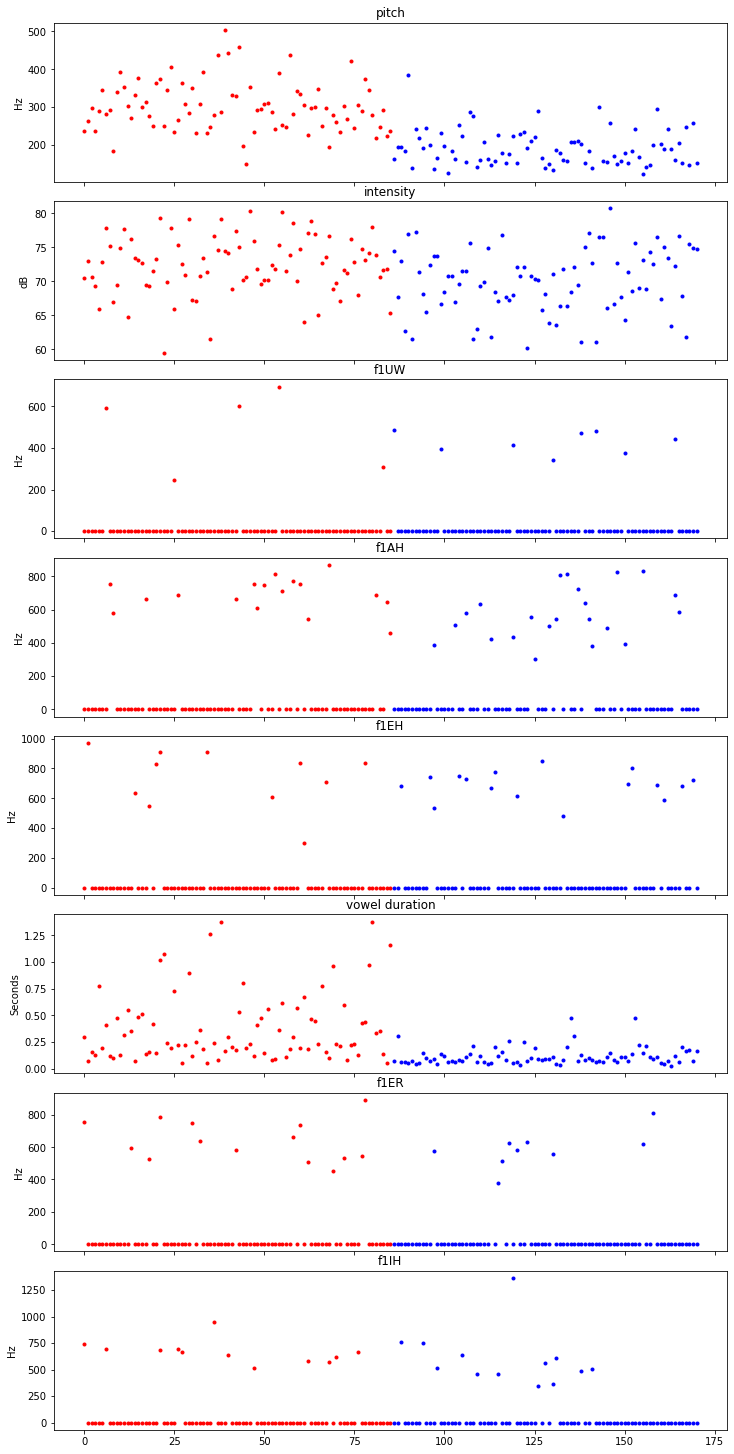

In [154]:
import csv
import pandas
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn import metrics
import matplotlib.pyplot as plt

# Feature data will be stored in npdata (a 2D numpy array).
    # This will be a 2D array. Each row represents a person.
    # Each element in row is a feature value (pitch, energy, duration as floats).
nparray_sung = np.array(sung)
nparray_voice = np.array(voice)
## You may read the file in yourself with the basic i/o library and .split(",")
## or you can use the csv library, pandas read_cvs, or numpy genfromtxt. 
## The important thing is that you populate the target and data variables correctly
## and that they end up as numpy arrays and not lists.



# You can run this cell without modifying the code.

# Create a separate nparray for each feature (pitch, intensity, and duration)
pitch_sung = nparray_sung[:,0:1]
intensity_sung = nparray_sung[:,1:2]
f1A_sung = nparray_sung[:,2:3]
f1O_sung = nparray_sung[:,3:4]
f1E_sung = nparray_sung[:,4:5]
vowelDuration_sung = nparray_sung[:,5:6]
f1_sung = nparray_sung[:,6:7]
f2_sung = nparray_sung[:,7:8]


pitch_voice = nparray_voice[:,0:1]
intensity_voice = nparray_voice[:,1:2]
f1A_voice = nparray_voice[:,2:3]
f1O_voice = nparray_voice[:,3:4]
f1E_voice = nparray_voice[:,4:5]
vowelDuration_voice = nparray_voice[:,5:6]
f1_voice = nparray_voice[:,6:7]
f2_voice = nparray_voice[:,7:8]

# Create a plot with three subplots
fig, axs = plt.subplots(8, sharex=True)


for i in range(len(nparray_sung)):
        axs[0].plot(i,pitch_sung[i], color="red", marker=".")
        axs[1].plot(i,intensity_sung[i], color="red", marker=".")
        axs[2].plot(i,f1A_sung[i], color="red", marker=".")
        axs[3].plot(i,f1O_sung[i], color="red", marker=".")
        axs[4].plot(i,f1E_sung[i], color="red", marker=".")
        axs[5].plot(i,vowelDuration_sung[i], color="red", marker=".")
        axs[6].plot(i,f1_sung[i], color="red", marker=".")
        axs[7].plot(i,f2_sung[i], color="red", marker=".")
for i in range(len(nparray_voice)):
        axs[0].plot(i+len(nparray_sung),pitch_voice[i], color="blue", marker=".")
        axs[1].plot(i+len(nparray_sung),intensity_voice[i], color="blue", marker=".")
        axs[2].plot(i+len(nparray_sung),f1A_voice[i], color="blue", marker=".")
        axs[3].plot(i+len(nparray_sung),f1O_voice[i], color="blue", marker=".")
        axs[4].plot(i+len(nparray_sung),f1E_voice[i], color="blue", marker=".")
        axs[5].plot(i+len(nparray_sung),vowelDuration_voice[i], color="blue", marker=".")
        axs[6].plot(i+len(nparray_sung),f1_voice[i], color="blue", marker=".")
        axs[7].plot(i+len(nparray_sung),f2_voice[i], color="blue", marker=".")

axs[0].set_title("pitch")
axs[1].set_title("intensity")
axs[2].set_title("f1UW")
axs[3].set_title("f1AH")
axs[4].set_title("f1EH")
axs[5].set_title("vowel duration")
axs[6].set_title("f1ER")
axs[7].set_title("f1IH")

axs[0].set_ylabel("Hz")
axs[1].set_ylabel("dB")
axs[2].set_ylabel("Hz")
axs[3].set_ylabel("Hz")
axs[4].set_ylabel("Hz")
axs[5].set_ylabel("Seconds")
axs[6].set_ylabel("Hz")
axs[7].set_ylabel("Hz")

fig.set_figheight(20)
fig.set_figwidth(10)

fig.tight_layout(pad=0.0)

plt.show()